# Comparación de Resultados - Prácticas 1 a 4

- **P1**: Comparación de optimizadores (SGD, Adagrad, RMSprop, Adam)
- **P2**: Configuración de hiperparámetros con Adam
- **P3**: Red Convolucional (CNN)
- **P4**: Transfer Learning con MobileNet

In [221]:
import torch.nn as nn
import os
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use('default')
sns.set_palette("husl")

In [222]:
df_p1 = pd.read_csv('p1/results/comparison_table.csv')
df_p2 = pd.read_csv('p2/results/comparison_table.csv')
df_p3_train = pd.read_csv('p3/results/training_metrics.csv')
df_p3_test = pd.read_csv('p3/results/test_metrics.csv')
df_p4_train = pd.read_csv('p4/results/training_metrics.csv')
df_p4_test = pd.read_csv('p4/results/test_metrics.csv')
df_p2_par = pd.read_csv('p2_par/results/comparison_table.csv')

## 1. Resumen de mejores resultados por práctica

In [223]:
# Práctica 1: Mejor configuración
best_p1 = df_p1.loc[df_p1['Test Acc'].astype(float).idxmax()]

# Práctica 2: Mejor configuración
best_p2 = df_p2.loc[df_p2['Val Accuracy'].astype(float).idxmax()]

# Práctica 3: Mejor evaluación en test
best_p3 = df_p3_test.loc[df_p3_test['accuracy'].astype(float).idxmax()]

# Práctica 4: Mejor evaluación en test
best_p4 = df_p4_test.loc[df_p4_test['accuracy'].astype(float).idxmax()]

# Crear tabla resumen
summary_data = {
    'Práctica': ['P1 - Optimizadores', 'P2 - Hiperparámetros*', 'P3 - CNN', 'P4 - Transfer Learning'],
    'Modelo/Config': [
        best_p1['Configuración'],
        best_p2['Configuración'],
        'CNN (2 Conv + FC)',
        'MobileNet (Fine-tuning)'
    ],
    'Accuracy (%)': [
        f"{best_p1['Test Acc']:.2%}" if isinstance(best_p1['Test Acc'], float) else best_p1['Test Acc'],
        f"{float(best_p2['Val Accuracy']):.2%}",
        f"{best_p3['accuracy']:.2f}%",
        f"{best_p4['accuracy']:.2f}%"
    ],
    'Loss': [
        f"{best_p1['Test Loss']:.4f}" if isinstance(best_p1['Test Loss'], float) else best_p1['Test Loss'],
        f"{float(best_p2['Val Loss']):.4f}",
        f"{best_p3['loss']:.4f}",
        f"{best_p4['loss']:.4f}"
    ],
    'Arquitectura': [
        best_p1['Capas'],
        f"{best_p2['Neuronas']} neuronas",
        '2 Conv + MaxPool + FC',
        'MobileNet pretrained'
    ]
}

df_summary = pd.DataFrame(summary_data)

print("\n" + "="*120)
print("📊 RESUMEN DE MEJORES RESULTADOS POR PRÁCTICA")
print("="*120)

pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)
pd.set_option('display.max_columns', None)

col_widths = [25, 30, 15, 12, 30]
header = f"{'Práctica':<{col_widths[0]}} | {'Modelo/Config':<{col_widths[1]}} | {'Accuracy':<{col_widths[2]}} | {'Loss':<{col_widths[3]}} | {'Arquitectura':<{col_widths[4]}}"
print("\n" + header)
print("─" * 120)

for idx, row in df_summary.iterrows():
    line = f"{row['Práctica']:<{col_widths[0]}} | {row['Modelo/Config']:<{col_widths[1]}} | {row['Accuracy (%)']:<{col_widths[2]}} | {row['Loss']:<{col_widths[3]}} | {row['Arquitectura']:<{col_widths[4]}}"
    print(line)

print("="*120)

# Añadir nota al pie sobre la mejor configuración de P2
print(f"\n* P2 - Mejor configuración ({best_p2['Configuración']}):")
print(f"    Neuronas: {best_p2['Neuronas']}, Épocas: {best_p2['Épocas']}, Batch Size: {best_p2['Batch Size']}, ")
print(f"    Learning Rate: {best_p2['LR']}, Validation Split: {best_p2['Val Split']}")
print()


📊 RESUMEN DE MEJORES RESULTADOS POR PRÁCTICA

Práctica                  | Modelo/Config                  | Accuracy        | Loss         | Arquitectura                  
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
P1 - Optimizadores        | Adam                           | 97.23%          | 0.1489       | [128]                         
P2 - Hiperparámetros*     | Config_61                      | 98.42%          | 0.0632       | 512 neuronas                  
P3 - CNN                  | CNN (2 Conv + FC)              | 99.13%          | 0.0668       | 2 Conv + MaxPool + FC         
P4 - Transfer Learning    | MobileNet (Fine-tuning)        | 96.61%          | 0.1054       | MobileNet pretrained          

* P2 - Mejor configuración (Config_61):
    Neuronas: 512, Épocas: 15, Batch Size: 256, 
    Learning Rate: 0.001, Validation Split: 0.1



## 2. Comparación visual de accuracy

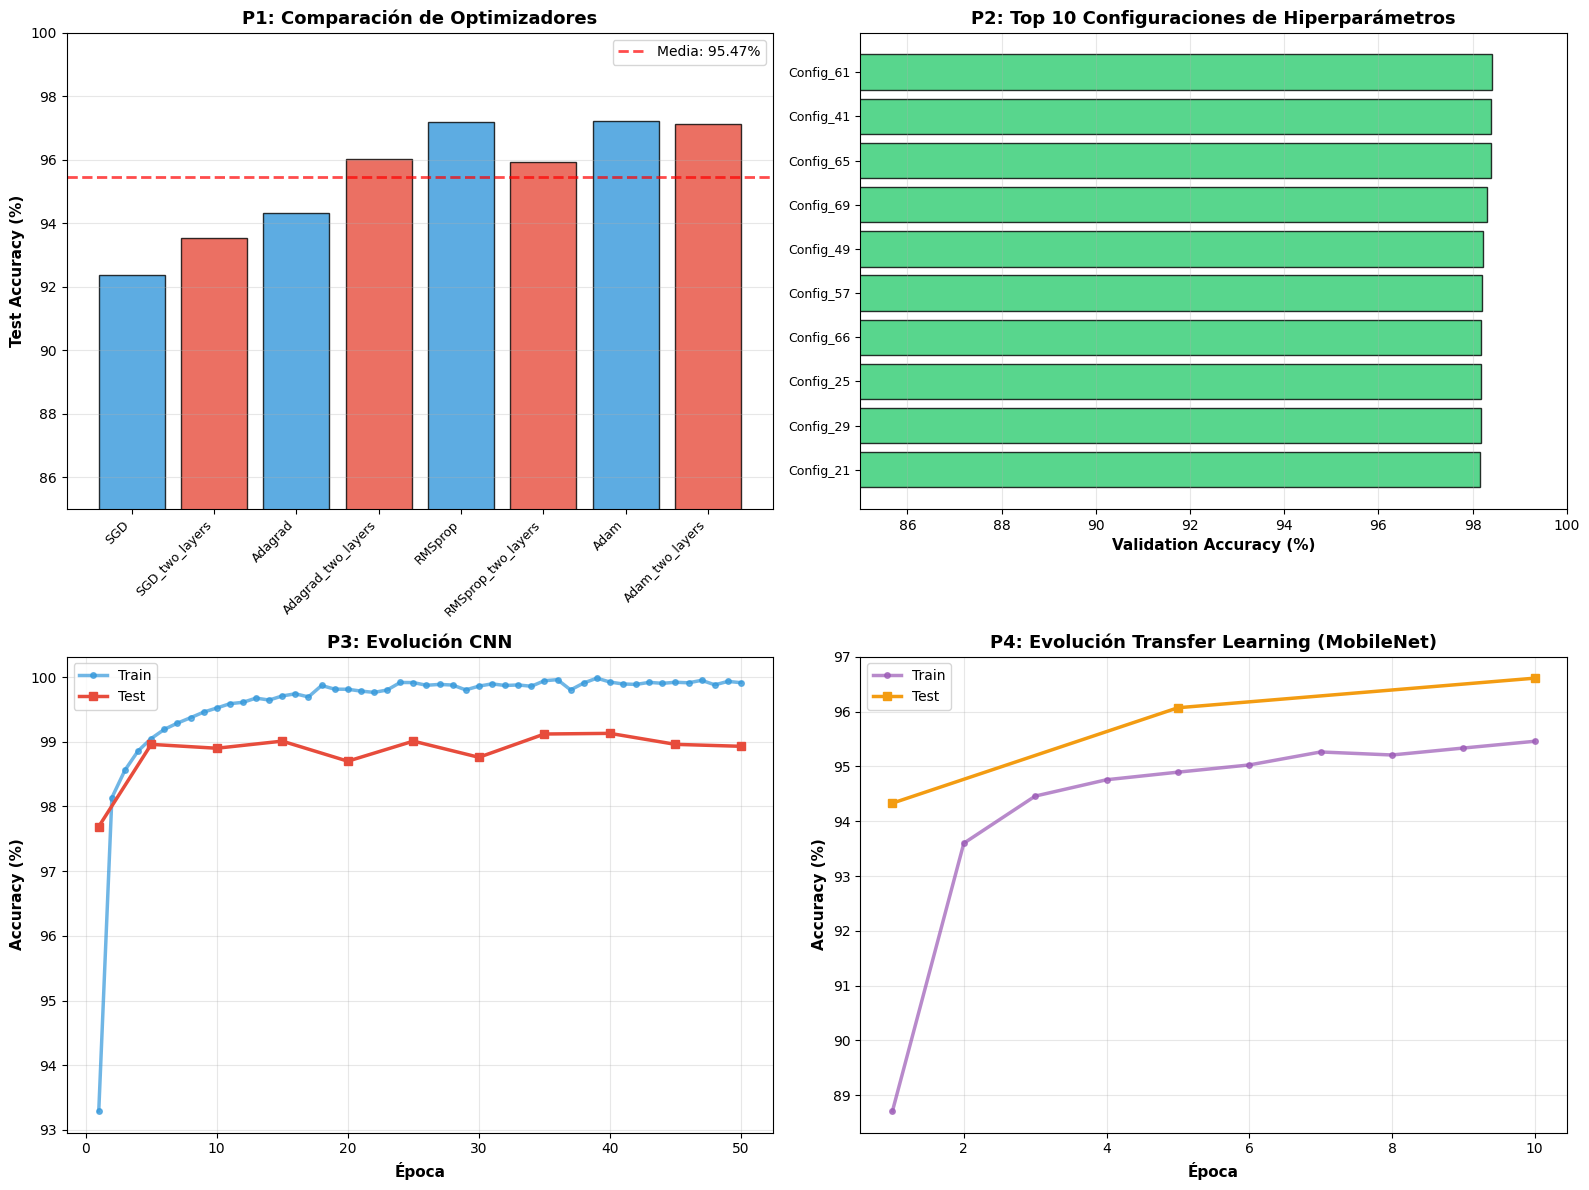

In [224]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# P1: Comparación de optimizadores
ax1 = axes[0, 0]
test_accs_p1 = df_p1['Test Acc'].astype(float) * 100
colors_p1 = ['#3498db' if 'two_layers' not in name else '#e74c3c'
             for name in df_p1['Configuración']]
bars1 = ax1.bar(range(len(df_p1)), test_accs_p1, color=colors_p1, alpha=0.8, edgecolor='black')
ax1.set_xticks(range(len(df_p1)))
ax1.set_xticklabels(df_p1['Configuración'], rotation=45, ha='right', fontsize=9)
ax1.set_ylabel('Test Accuracy (%)', fontsize=11, fontweight='bold')
ax1.set_title('P1: Comparación de Optimizadores', fontsize=13, fontweight='bold')
ax1.set_ylim(85, 100)
ax1.grid(True, alpha=0.3, axis='y')
ax1.axhline(y=test_accs_p1.mean(), color='red', linestyle='--', linewidth=2, alpha=0.7, label=f'Media: {test_accs_p1.mean():.2f}%')
ax1.legend()

# P2: Top 10 mejores configuraciones
ax2 = axes[0, 1]
df_p2_sorted = df_p2.sort_values('Val Accuracy', ascending=False).head(10)
val_accs_p2 = df_p2_sorted['Val Accuracy'].astype(float) * 100
bars2 = ax2.barh(range(len(df_p2_sorted)), val_accs_p2, color='#2ecc71', alpha=0.8, edgecolor='black')
ax2.set_yticks(range(len(df_p2_sorted)))
ax2.set_yticklabels(df_p2_sorted['Configuración'], fontsize=9)
ax2.set_xlabel('Validation Accuracy (%)', fontsize=11, fontweight='bold')
ax2.set_title('P2: Top 10 Configuraciones de Hiperparámetros', fontsize=13, fontweight='bold')
ax2.set_xlim(85, 100)
ax2.grid(True, alpha=0.3, axis='x')
ax2.invert_yaxis()

# P3: Evolución durante entrenamiento CNN
ax3 = axes[1, 0]
ax3.plot(df_p3_train['epoch'], df_p3_train['accuracy'],
         label='Train', linewidth=2.5, color='#3498db', marker='o', markersize=4, alpha=0.7)
ax3.plot(df_p3_test['epoch'], df_p3_test['accuracy'],
         label='Test', linewidth=2.5, color='#e74c3c', marker='s', markersize=6)
ax3.set_xlabel('Época', fontsize=11, fontweight='bold')
ax3.set_ylabel('Accuracy (%)', fontsize=11, fontweight='bold')
ax3.set_title('P3: Evolución CNN', fontsize=13, fontweight='bold')
ax3.legend(fontsize=10)
ax3.grid(True, alpha=0.3)

# P4: Evolución durante entrenamiento Transfer Learning
ax4 = axes[1, 1]
ax4.plot(df_p4_train['epoch'], df_p4_train['accuracy'],
         label='Train', linewidth=2.5, color='#9b59b6', marker='o', markersize=4, alpha=0.7)
ax4.plot(df_p4_test['epoch'], df_p4_test['accuracy'],
         label='Test', linewidth=2.5, color='#f39c12', marker='s', markersize=6)
ax4.set_xlabel('Época', fontsize=11, fontweight='bold')
ax4.set_ylabel('Accuracy (%)', fontsize=11, fontweight='bold')
ax4.set_title('P4: Evolución Transfer Learning (MobileNet)', fontsize=13, fontweight='bold')
ax4.legend(fontsize=10)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 3. Análisis de tiempo de entrenamiento

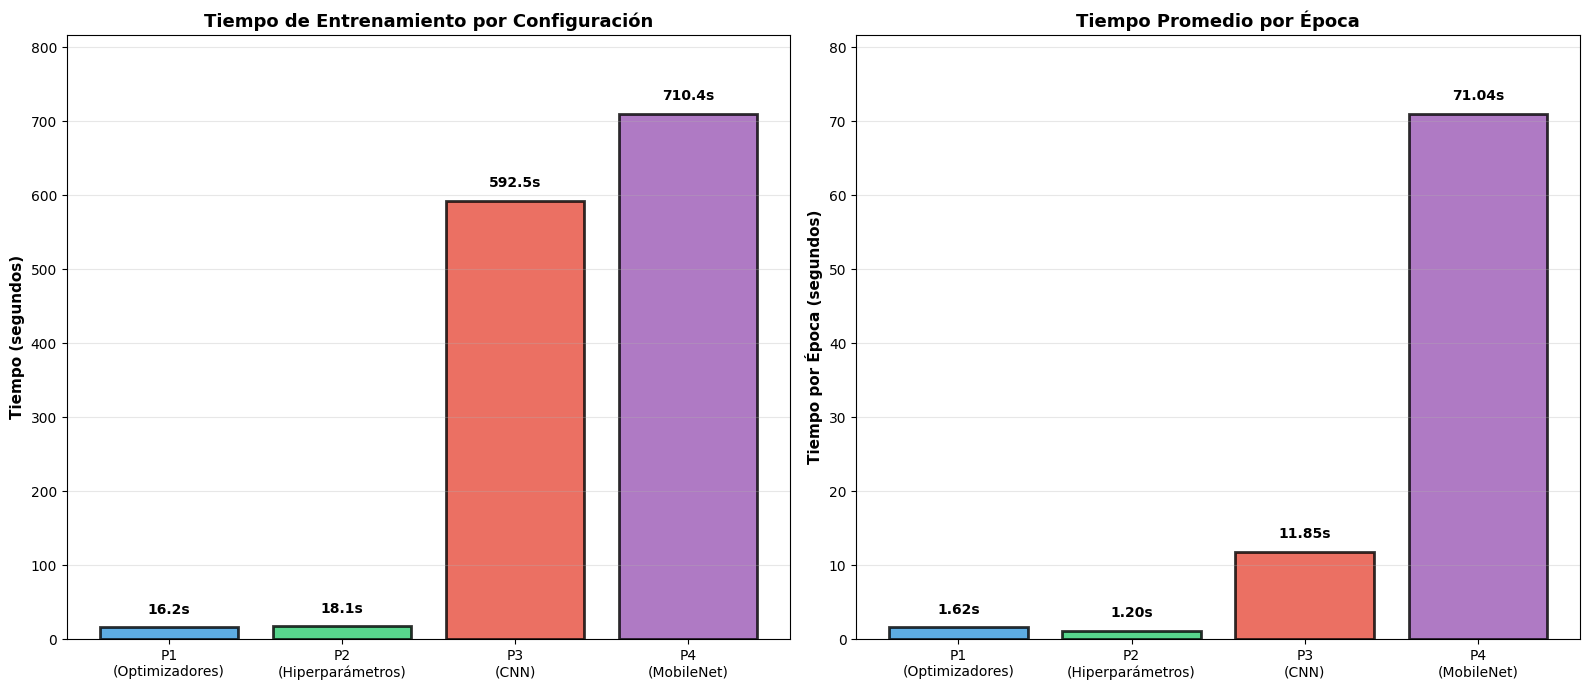

In [225]:
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Calcular métricas de tiempo
practice_names = ['P1\n(Optimizadores)', 'P2\n(Hiperparámetros)', 'P3\n(CNN)', 'P4\n(MobileNet)']

# Tiempos medios de entrenamiento por configuración
mean_times = [
    df_p1['Tiempo (s)'].astype(float).mean(),   # Tiempo medio por configuración P1
    df_p2['Tiempo (s)'].astype(float).mean(),   # Tiempo medio por configuración P2
    11.85 * df_p3_train['epoch'].max(),  # P3: tiempo total de entrenamiento CNN
    71.04 * df_p4_train['epoch'].max()   # P4: tiempo total de entrenamiento MobileNet
]

# Tiempo por época
time_per_epoch = [
    df_p1['Tiempo (s)'].astype(float).mean() / 10,  # P1: tiempo medio / 10 épocas
    df_p2['Tiempo (s)'].astype(float).mean() / df_p2['Épocas'].astype(float).mean(),  # P2: tiempo medio / épocas medias
    11.85,  # P3: tiempo medio por época CNN
    71.04   # P4: tiempo medio por época MobileNet
]

colors = ['#3498db', '#2ecc71', '#e74c3c', '#9b59b6']

# Gráfico 1: Tiempo de entrenamiento
ax1 = axes[0]
bars1 = ax1.bar(practice_names, mean_times, color=colors, alpha=0.8, edgecolor='black', linewidth=2)

for bar, time in zip(bars1, mean_times):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + max(mean_times) * 0.02,
             f'{time:.1f}s',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

ax1.set_ylabel('Tiempo (segundos)', fontsize=11, fontweight='bold')
ax1.set_title('Tiempo de Entrenamiento por Configuración', fontsize=13, fontweight='bold')
ax1.set_ylim(0, max(mean_times) * 1.15)
ax1.grid(True, alpha=0.3, axis='y')

# Gráfico 2: Tiempo por época
ax2 = axes[1]
bars2 = ax2.bar(practice_names, time_per_epoch, color=colors, alpha=0.8, edgecolor='black', linewidth=2)

for bar, time in zip(bars2, time_per_epoch):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + max(time_per_epoch) * 0.02,
             f'{time:.2f}s',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

ax2.set_ylabel('Tiempo por Época (segundos)', fontsize=11, fontweight='bold')
ax2.set_title('Tiempo Promedio por Época', fontsize=13, fontweight='bold')
ax2.set_ylim(0, max(time_per_epoch) * 1.15)
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## 4. Comparación de accuracy final

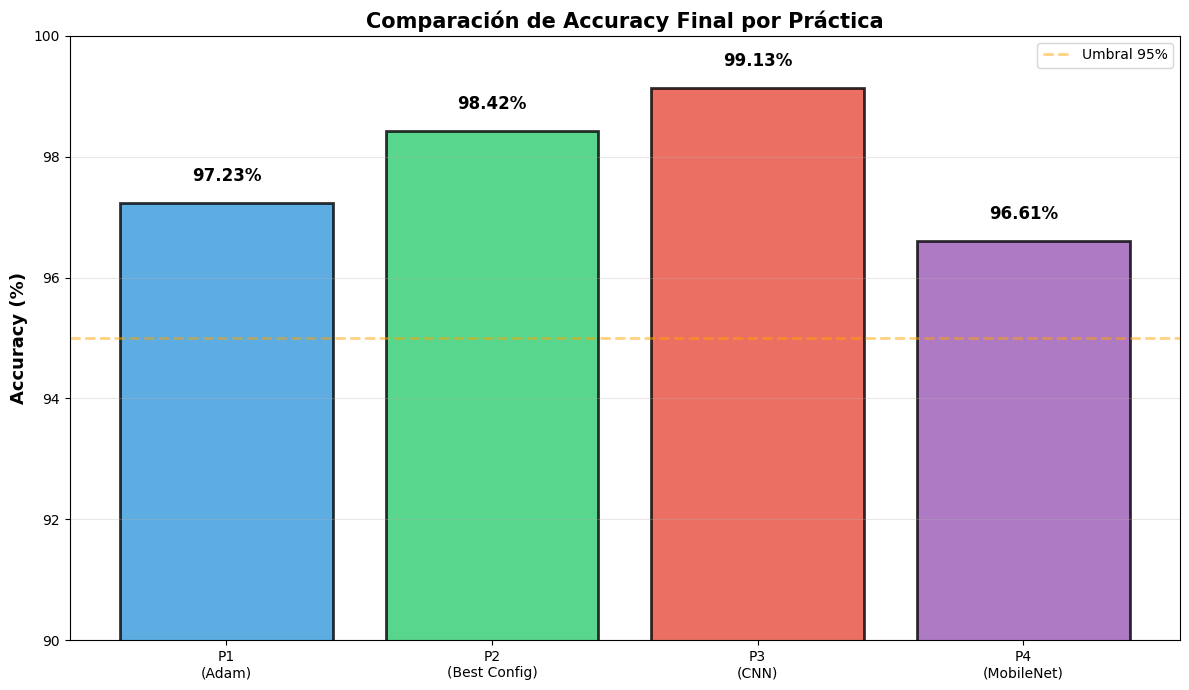

In [226]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))

# Datos para comparar
practice_names = ['P1\n(Adam)', 'P2\n(Best Config)', 'P3\n(CNN)', 'P4\n(MobileNet)']
accuracies = [
    float(best_p1['Test Acc']) * 100,
    float(best_p2['Val Accuracy']) * 100,
    best_p3['accuracy'],
    best_p4['accuracy']
]
colors_comp = ['#3498db', '#2ecc71', '#e74c3c', '#9b59b6']

bars = ax.bar(practice_names, accuracies, color=colors_comp, alpha=0.8, edgecolor='black', linewidth=2)

# Añadir valores encima de las barras
for i, (bar, acc) in enumerate(zip(bars, accuracies)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.3,
            f'{acc:.2f}%',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_ylabel('Accuracy (%)', fontsize=13, fontweight='bold')
ax.set_title('Comparación de Accuracy Final por Práctica', fontsize=15, fontweight='bold')
ax.set_ylim([90, 100])
ax.grid(True, alpha=0.3, axis='y')
ax.axhline(y=95, color='orange', linestyle='--', linewidth=2, alpha=0.5, label='Umbral 95%')
ax.legend()

plt.tight_layout()
plt.show()

## 4. Análisis de Eficiencia vs Rendimiento

/var/folders/kl/v8fdnqtx5x12lkg102ltglkr0000gn/T/ipykernel_75075/2282381127.py:62: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/jorvarea/Desktop/Universidad/Tercer_curso/primer_cuatrimestre/Deep_Learning/practicas/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


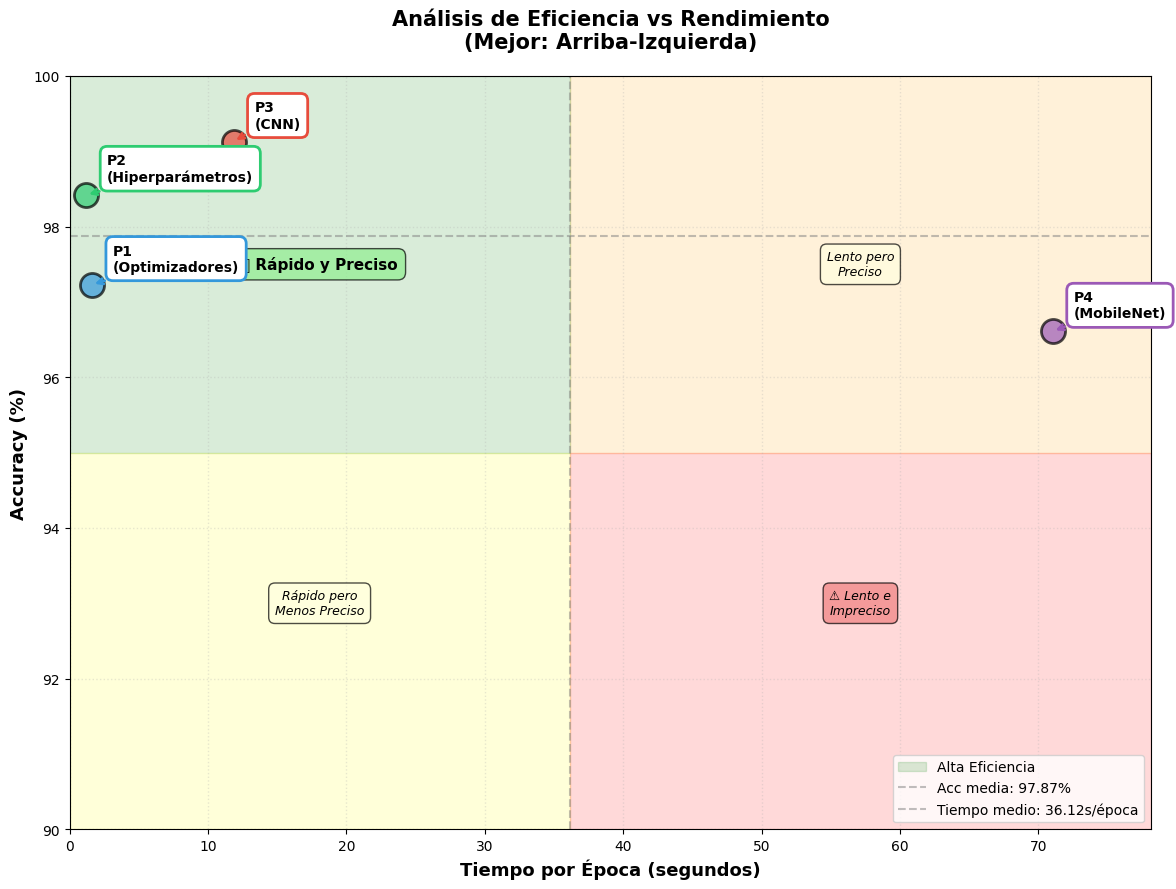

In [227]:
fig, ax = plt.subplots(1, 1, figsize=(12, 9))

# Datos de las prácticas
practice_labels = ['P1\n(Optimizadores)', 'P2\n(Hiperparámetros)', 'P3\n(CNN)', 'P4\n(MobileNet)']
accuracies_scatter = [
    float(best_p1['Test Acc']) * 100,
    float(best_p2['Val Accuracy']) * 100,
    best_p3['accuracy'],
    best_p4['accuracy']
]
times_scatter = time_per_epoch
colors_scatter = ['#3498db', '#2ecc71', '#e74c3c', '#9b59b6']
sizes = [300, 300, 300, 300]

# Calcular punto medio para dividir cuadrantes
mid_accuracy = (max(accuracies_scatter) + min(accuracies_scatter)) / 2
mid_time = (max(times_scatter) + min(times_scatter)) / 2

# Dibujar cuadrantes de fondo
ax.axvspan(0, mid_time, ymin=0.5, ymax=1, alpha=0.15, color='green', label='Alta Eficiencia')
ax.axvspan(0, mid_time, ymin=0, ymax=0.5, alpha=0.15, color='yellow')
ax.axvspan(mid_time, max(times_scatter) * 1.1, ymin=0.5, ymax=1, alpha=0.15, color='orange')
ax.axvspan(mid_time, max(times_scatter) * 1.1, ymin=0, ymax=0.5, alpha=0.15, color='red')

# Añadir etiquetas de cuadrantes
ax.text(mid_time * 0.5, 97.5, '🏆 Rápido y Preciso',
        ha='center', va='center', fontsize=11, fontweight='bold',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgreen', alpha=0.7))
ax.text(mid_time * 0.5, 93, 'Rápido pero\nMenos Preciso',
        ha='center', va='center', fontsize=9, style='italic',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='lightyellow', alpha=0.7))
ax.text(mid_time + (max(times_scatter) * 1.1 - mid_time) * 0.5, 97.5, 'Lento pero\nPreciso',
        ha='center', va='center', fontsize=9, style='italic',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='lightyellow', alpha=0.7))
ax.text(mid_time + (max(times_scatter) * 1.1 - mid_time) * 0.5, 93, '⚠️ Lento e\nImpreciso',
        ha='center', va='center', fontsize=9, style='italic',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='lightcoral', alpha=0.7))

# Plotear puntos
for i, (label, acc, time, color, size) in enumerate(zip(practice_labels, accuracies_scatter, times_scatter, colors_scatter, sizes)):
    ax.scatter(time, acc, s=size, color=color, alpha=0.7, edgecolors='black', linewidth=2, zorder=5)
    ax.annotate(label, (time, acc),
                xytext=(15, 10), textcoords='offset points',
                fontsize=10, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor=color, linewidth=2),
                arrowprops=dict(arrowstyle='->', color=color, linewidth=2),
                zorder=10)

# Líneas de referencia
ax.axhline(y=mid_accuracy, color='gray', linestyle='--', linewidth=1.5, alpha=0.5, label=f'Acc media: {mid_accuracy:.2f}%')
ax.axvline(x=mid_time, color='gray', linestyle='--', linewidth=1.5, alpha=0.5, label=f'Tiempo medio: {mid_time:.2f}s/época')

ax.set_xlabel('Tiempo por Época (segundos)', fontsize=13, fontweight='bold')
ax.set_ylabel('Accuracy (%)', fontsize=13, fontweight='bold')
ax.set_title('Análisis de Eficiencia vs Rendimiento\n(Mejor: Arriba-Izquierda)',
             fontsize=15, fontweight='bold', pad=20)
ax.set_xlim(0, max(times_scatter) * 1.1)
ax.set_ylim(90, 100)
ax.grid(True, alpha=0.3, linestyle=':', linewidth=1)
ax.legend(loc='lower right', fontsize=10)

plt.tight_layout()
plt.show()

## 5. Conclusiones

A la vista de los resultados obtenidos, podemos concluir que el modelo más preciso para el problema de clasificación del MNIST es la red convolucional de la práctica 3, con 2 capas convolucionales, max pooling y una capa fully connected.

A pesar de que todos los modelos obtienen una precisión mayor al 96%, la CNN es la única que sobrepasa la barrera del 99% (99.13%), seguida de la mejor configuración de la práctica 2, con un 98.42%

Si estudiamos los resultados de la práctica 1, podemos ver que los mejores optimizadores para este problema son Adam y RMSProp, siendo el primero claramente superior al aumentar el número de capas ocultas.

Con respecto a la práctica 2, la configuración de hiperparámetros que mejor funciona para este problema es la de 512 neuronas, un batch size de 256, tasa de aprendizaje de 0.001 y un split de validación del 10% del total.

Es remarcable el hecho de que la CNN simple aprende más rápido que el modelo pre-entrenado (en este caso escogimos MobileNet por su tamaño reducido frente a otros como VGG o Resnet). Para la CNN, tras la primera época ya teníamos una precisión del 97.7%, mientras que el fine-tuning de MobileNet estaba alrededor del 94%. Tras solo 5 épocas, la CNN ya obtiene una precisión mayor al 99%, mientras que MobileNet se queda en un 96%.

También hay mucha diferencia en el tiempo de entrenamiento. El tiempo medio por época de MobileNet es 6x el de la CNN, y este último es 7x el de los modelos de las primeras prácticas.

Esto sugiere que no siempre un modelo más grande tiene por qué ser mejor. Para cada problema, hay que elegir el modelo que mejor se ajuste.

Por último, analizamos la eficiencia de cada modelo frente al rendimiento, donde el mejor balance lo tienen la CNN y la mejor configuración de la práctica 2. Entre estos dos, nos decantaríamos por la CNN si queremos mayor precisión y por la red más simple si queremos una mayor velocidad de entrenamiento

# Resultados Práctica 5 - GAN

## 1. Arquitectura del Generador y Discriminador

### **Generador** (Ruido → Imagen)
```
Input: z ~ N(0,1)  [dim: 100]
  ↓
Linear(100, 256) → BatchNorm1d → ReLU
  ↓
Linear(256, 512) → BatchNorm1d → ReLU
  ↓
Linear(512, 1024) → BatchNorm1d → ReLU
  ↓
Linear(1024, 784) → Tanh
  ↓
Output: Imagen 28×28  [range: [-1, 1]]
```

### **Discriminador** (Imagen → Real/Fake)
```
Input: Imagen 28×28 (784)
  ↓
Linear(784, 512) → LeakyReLU(0.2) → Dropout(0.3)
  ↓
Linear(512, 256) → LeakyReLU(0.2) → Dropout(0.3)
  ↓
Linear(256, 1) → Sigmoid
  ↓
Output: Probabilidad [0, 1]  (0=Fake, 1=Real)
```

## 2. Evolución del Ruido Aplicado al Discriminador

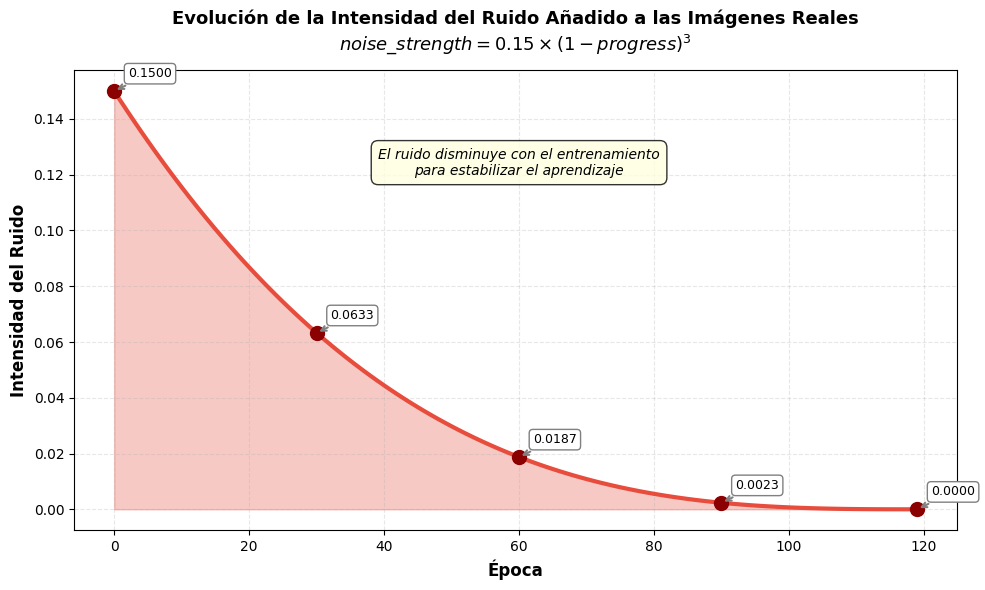

In [228]:
# Función de ruido: noise_strength = 0.15 * ((1 - progress) ** 3)
# donde progress = epoch / total_epochs

total_epochs = 120
epochs = np.arange(0, total_epochs)
progress = epochs / total_epochs
noise_strength = 0.15 * ((1 - progress) ** 3)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(epochs, noise_strength, linewidth=3, color='#e74c3c')
ax.fill_between(epochs, 0, noise_strength, alpha=0.3, color='#e74c3c')

ax.set_xlabel('Época', fontsize=12, fontweight='bold')
ax.set_ylabel('Intensidad del Ruido', fontsize=12, fontweight='bold')
ax.set_title('Evolución de la Intensidad del Ruido Añadido a las Imágenes Reales\n' +
             r'$noise\_strength = 0.15 \times (1 - progress)^3$',
             fontsize=13, fontweight='bold', pad=15)
ax.grid(True, alpha=0.3, linestyle='--')

# Añadir anotaciones en puntos clave
key_epochs = [0, 30, 60, 90, 119]
for epoch in key_epochs:
    prog = epoch / total_epochs
    noise = 0.15 * ((1 - prog) ** 3)
    ax.plot(epoch, noise, 'o', markersize=10, color='darkred')
    ax.annotate(f'{noise:.4f}',
                xy=(epoch, noise),
                xytext=(10, 10),
                textcoords='offset points',
                fontsize=9,
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='gray'),
                arrowprops=dict(arrowstyle='->', color='gray', linewidth=1.5))

ax.text(60, 0.12, 'El ruido disminuye con el entrenamiento\npara estabilizar el aprendizaje',
        ha='center', fontsize=10, style='italic',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='lightyellow', alpha=0.8))

plt.tight_layout()
plt.show()

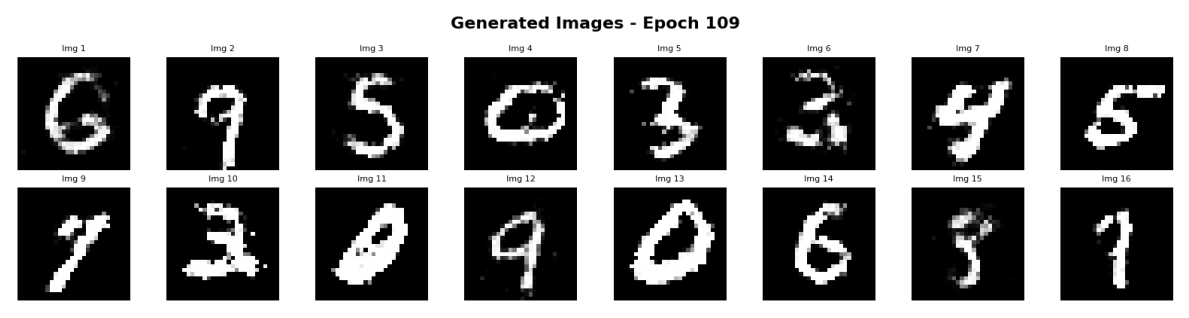

In [229]:
img = Image.open('trabajo_images/generated_images.png')
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.tight_layout()
plt.show()

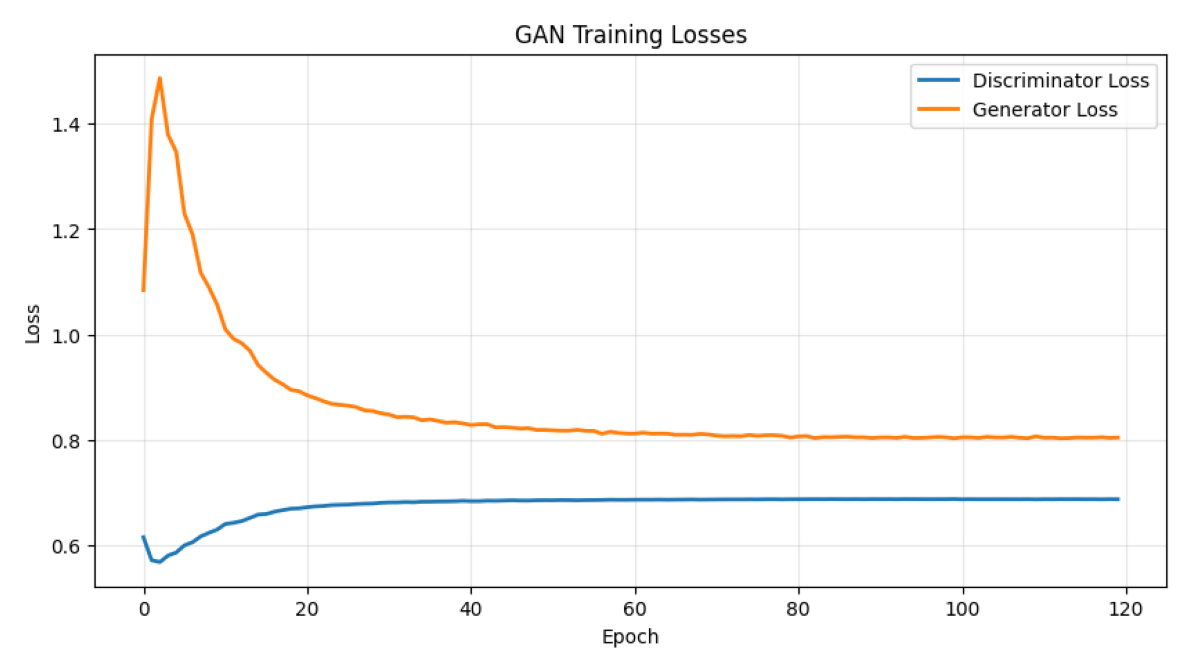

In [230]:
img = Image.open('trabajo_images/gan_training_losses.png')
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.tight_layout()
plt.show()

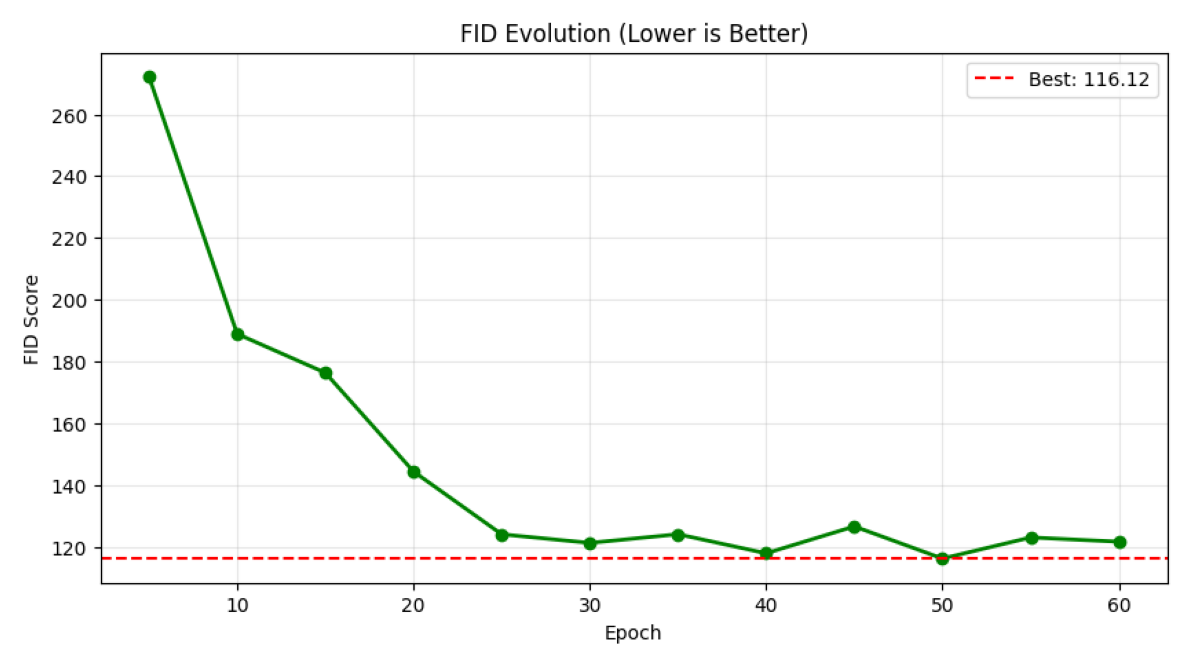

In [231]:
img = Image.open('trabajo_images/fid_evolution.png')
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.tight_layout()
plt.show()

## 3. Conclusiones

Para la práctica 5, tras muchas pruebas con diferentes arquitecturas e hiperparámetros, la configuración que mejor funciona es la de un generador con 3 capas ocultas con Batch Normalization y ReLU como función de activación, junto con un discriminador con dos capas ocultas con LeakyReLU y Dropout de 0.3.

Dentro de las estrategias que usamos está el introducir ruido en las imágenes que recibe el discriminador, que decae con el número de épocas según la ecuación de tercer grado $0.15 * ((1 - progress)³)$ siendo progress el porcentaje de épocas completadas. Esta ecuación tiene justo la pendiente que necesitamos porque introduce suficiente ruido al principio para que el generador no tenga tanta desventaja pero decae rápidamente con las épocas para que no afecte al resultado final.

También aplicamos Label Smoothing a las etiquetas verdaderas, para suavizar las predicciones del discriminador y que los gradientes del generador no se vuelvan muy pequeños (vanishing gradient)

Inicialmente probamos también a usar diferentes tasas de aprendizaje para generador y discriminador, o hacer que el generador actualizase sus gradientes 2 o tres veces por batch para evitar que el discriminador se hiciese demasiado bueno, pero en la configuración final no ha sido necesario. Lo que sí fue importante fue modificar los parámetros beta del optimizador Adam, para no darle tanto peso al momento y permitir a ambas redes adaptarse mejor a los cambios de la otra (beta1=0.5, beta2=0.999)

Entrenamos la red un total de 120 épocas, pero el mejor valor del FID (Fréchet Inception Distance) se alcanza a las 90 épocas. Hay que decir que el valor que se alcanza, 117.82, no es bueno, pero visualmente las imágenes que generamos tienen bastante similitud con las del dataset (aunque no siempre).

# Comparación: Clasificación 10 Dígitos vs Par/Impar

En este apartado comparamos dos enfoques diferentes sobre el mismo dataset MNIST:
- **P2 - 10 Dígitos**: Clasificación multiclase (0-9) con sparse_categorical_crossentropy
- **P2 - Par/Impar**: Clasificación binaria (par vs impar) con binary_crossentropy

Ambos modelos utilizan **exactamente la misma arquitectura e hiperparámetros**:
- 1 capa oculta con 512 neuronas + ReLU
- 15 épocas
- Batch size: 256
- Learning rate: 0.001
- Validation split: 0.1
- Optimizer: Adam

## 1. Comparación de resultados

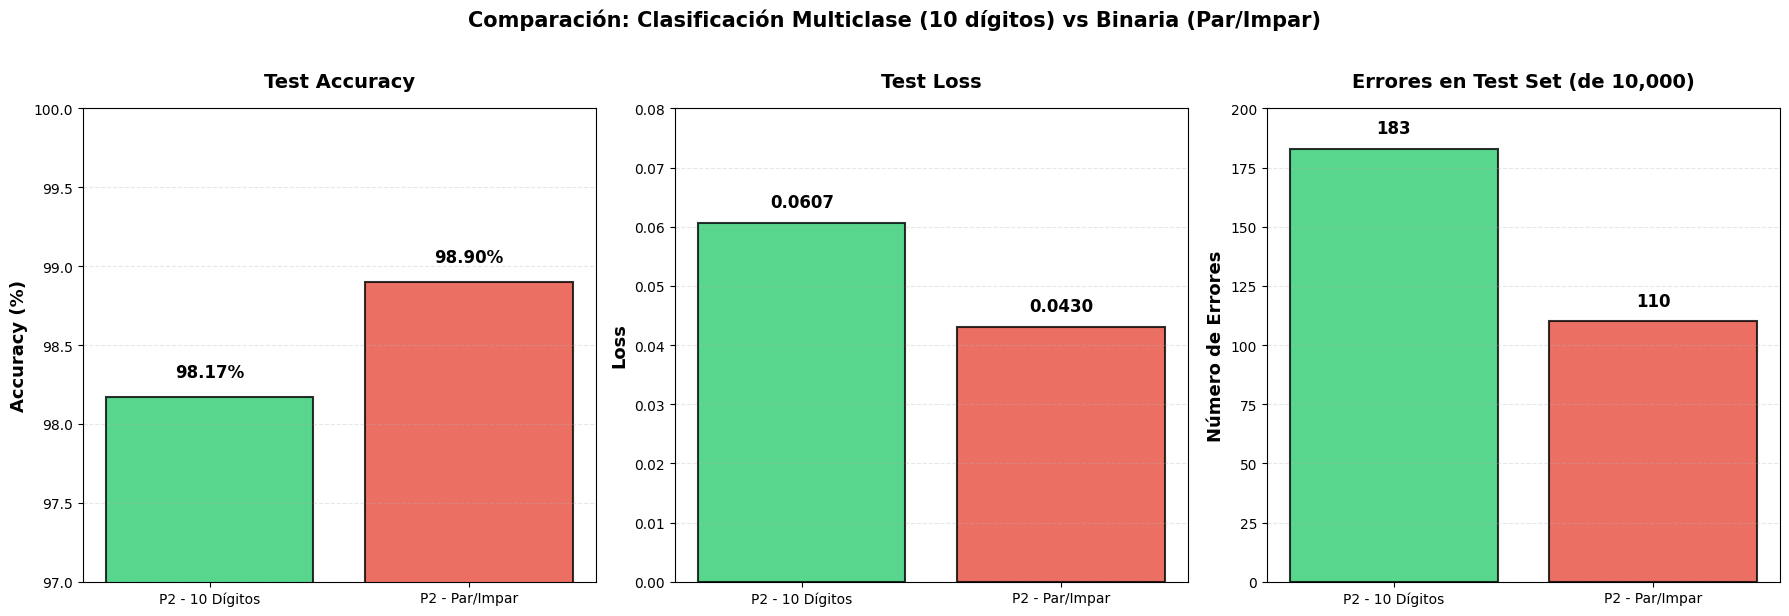

In [232]:
best_p2_par = df_p2_par.iloc[0]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

models_comparison = ['P2 - 10 Dígitos', 'P2 - Par/Impar']
colors_comparison = ['#2ecc71', '#e74c3c']

# Test Accuracy
test_accs_comparison = [98.17, 98.90]  # P2: 0.9817, Par/Impar: 0.9890
bars1 = axes[0].bar(models_comparison, test_accs_comparison, color=colors_comparison,
                    alpha=0.8, edgecolor='black', linewidth=1.5)
axes[0].set_ylabel('Accuracy (%)', fontsize=13, fontweight='bold')
axes[0].set_title('Test Accuracy', fontsize=14, fontweight='bold', pad=15)
axes[0].set_ylim([97, 100])
axes[0].grid(True, alpha=0.3, axis='y', linestyle='--')
for bar, acc in zip(bars1, test_accs_comparison):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                 f'{acc:.2f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Test Loss
test_losses_comparison = [0.0607, 0.0430]  # P2: 0.0607, Par/Impar: 0.0430
bars2 = axes[1].bar(models_comparison, test_losses_comparison, color=colors_comparison,
                    alpha=0.8, edgecolor='black', linewidth=1.5)
axes[1].set_ylabel('Loss', fontsize=13, fontweight='bold')
axes[1].set_title('Test Loss', fontsize=14, fontweight='bold', pad=15)
axes[1].set_ylim([0, 0.08])
axes[1].grid(True, alpha=0.3, axis='y', linestyle='--')
for bar, loss in zip(bars2, test_losses_comparison):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.002,
                 f'{loss:.4f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Test Errors
test_errors_comparison = [183, 110]  # P2: 183, Par/Impar: 110
bars3 = axes[2].bar(models_comparison, test_errors_comparison, color=colors_comparison,
                    alpha=0.8, edgecolor='black', linewidth=1.5)
axes[2].set_ylabel('Número de Errores', fontsize=13, fontweight='bold')
axes[2].set_title('Errores en Test Set (de 10,000)', fontsize=14, fontweight='bold', pad=15)
axes[2].set_ylim([0, 200])
axes[2].grid(True, alpha=0.3, axis='y', linestyle='--')
for bar, err in zip(bars3, test_errors_comparison):
    axes[2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
                 f'{err}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.suptitle('Comparación: Clasificación Multiclase (10 dígitos) vs Binaria (Par/Impar)',
             fontsize=15, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## 2. Matrices de Confusión

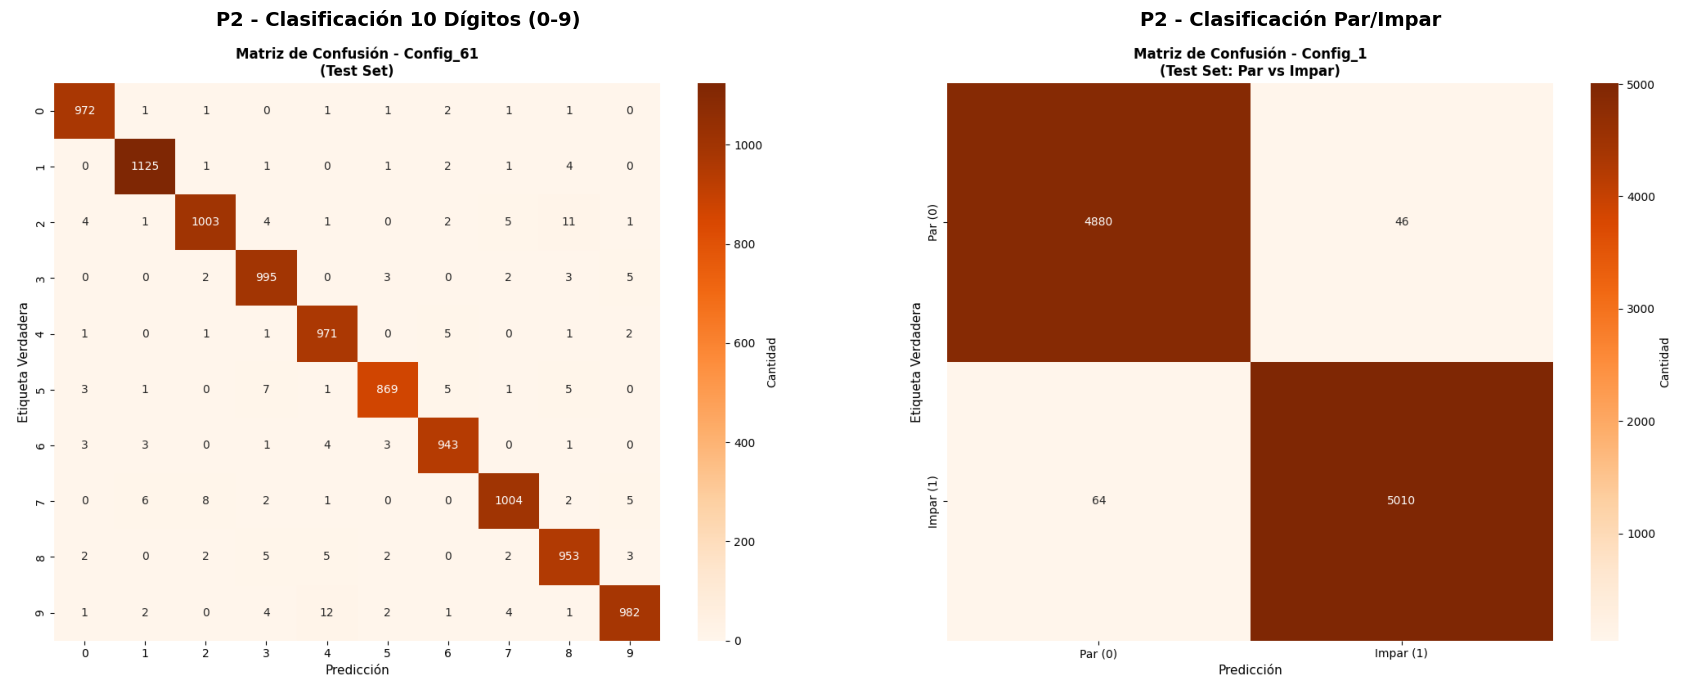

In [233]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Matriz de confusión P2 - 10 Dígitos
img_p2 = Image.open('trabajo_images/cm_test_p2.png')
axes[0].imshow(img_p2)
axes[0].axis('off')
axes[0].set_title('P2 - Clasificación 10 Dígitos (0-9)', fontsize=14, fontweight='bold', pad=10)

# Matriz de confusión P2_par - Par/Impar
img_p2_par = Image.open('trabajo_images/cm_test_p2_par.png')
axes[1].imshow(img_p2_par)
axes[1].axis('off')
axes[1].set_title('P2 - Clasificación Par/Impar', fontsize=14, fontweight='bold', pad=10)

plt.tight_layout()
plt.show()

## 3. Conclusiones

Comparamos los resultados de aplicar la misma arquitectura e hiperparámetros sobre los problemas de clasificación multiclase y clasificación en par/impar sobre el MNIST. La configuración elegida de hiperparámetros es aquella que dio mejores resultados en la práctica 2.

Observando los resultados vemos que la precisión del clasificador par/impar es superior a la del clasificador de 10 dígitos. Esta diferencia es del 0.73% y aunque no parezca mucho, cuando tenemos precisiones tan altas, una diferencia así es notable. También notamos que la pérdida del clasificador par/impar es menor, en la misma línea que la precisión.

Estos resultados se deben a que al distinguir únicamente entre pares e impares, la red no necesita diferenciar los números dentro de cada grupo. Si nos fijamos en la matriz de confusión del clasificador de 10 dígitos, vemos por ejemplo que el 2 y el 8 se confunden con frecuencia, en relación a fallos entre otros números, ocurriendo hasta en 11 ocasiones que se predice un 8 cuando en realidad es un 2. Al no tener que distinguir dentro de los pares, estos errores desaparecen y por eso la precisión es mayor.